# DATA CLEANING

In [70]:
import pandas as pd
from geopy.distance import great_circle, geodesic
from datetime import timedelta, date
import matplotlib.pyplot as plt
import numpy as np

In [128]:
#df = pd.read_csv('../Data/AIS_LA_SD_Jan_1_to_15_2016_Filtered_by_Proximity.csv')
df = pd.read_csv('../Data/Example_COLREGs_Interactions_UTM11.csv')

In [131]:
#This converts the time metric to a datetime object that can be easily subtracted
#df['Timestamp_1'] = pd.to_datetime(df['Timestamp_1'], errors='coerce') #coerce causes NaT for all out-of-bound dates
#df['Timestamp_2'] = pd.to_datetime(df['Timestamp_2'], errors='coerce') #coerce causes NaT for all out-of-bound dates

df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])

In [132]:
df.head()

COLREG_Type       MMSI        BaseDateTime        LAT         LON  SOG  COG  \
0  Overtaking  372747000 2017-12-03 09:00:16  33.648643 -120.275227    0    0   
1  Overtaking  372747000 2017-12-03 09:00:36  33.648692 -120.274767    0    0   
2  Overtaking  372747000 2017-12-03 09:01:00  33.648742 -120.274307    0    0   
3  Overtaking  372747000 2017-12-03 09:01:20  33.648792 -120.273847    0    0   
4  Overtaking  372747000 2017-12-03 09:01:40  33.648840 -120.273387    0    0   

   Heading      VesselName          IMO CallSign  VesselType Status  Length  \
0        0   CYGNUS LEADER   IMO9381249    3EKK5        1004    NaN  199.94   
1        0   CYGNUS LEADER   IMO9381249    3EKK5        1004    NaN  199.94   
2        0   CYGNUS LEADER   IMO9381249    3EKK5        1004    NaN  199.94   
3        0   CYGNUS LEADER   IMO9381249    3EKK5        1004    NaN  199.94   
4        0   CYGNUS LEADER   IMO9381249    3EKK5        1004    NaN  199.94   

   Width  Draft  Cargo  
0  32.26   10.0    NaN  
1  32.26   10.0    NaN  
2  32.26   10.0    NaN  
3  32.26   10.0    NaN  
4  32.26   10.0    NaN

In [32]:
# this is how you can caluate distance between two points
#one = (df['LAT_1'][0], df['LON_1'][0])
#two = (df['LAT_2'][0], df['LON_2'][0])
#print(great_circle(one,two).miles)
#print(geodesic(one,two).miles)
#newport_ri = (41.49008, -71.312796)
#cleveland_oh = (41.499498, -81.695391)
#print(great_circle(newport_ri, cleveland_oh).miles)

0.3857874583113783
0.38539567422430493


In [136]:
# Subset the data to a single day: Jan 18, 2017
# BaseDateTime_Rounded rounds the timestamps to the nearest 10 minutes
#day = df[df['BaseDateTime'].dt.date == datetime.date(2017, 1, 18)]        
#day = df[df['Timestamp_1'].dt.date == datetime.date(2016, 1, 1)]
#df['Timestamp_1_round'] = df['Timestamp_1'].dt.round('5min') #we are rounding
#df['Timestamp_2_round'] = df['Timestamp_2'].dt.round('5min') #we are rounding
#sorted_df = df.sort_values('Timestamp_1_round').reset_index(drop = True)
print("end")
df['BaseDateTime_Rounded'] = df['BaseDateTime'].dt.round('5min')
sorted_df = df.sort_values('BaseDateTime_Rounded').reset_index(drop = True)
#day = day.reset_index(drop = True)

end


In [137]:
#day.sort_values(by = ['BaseDateTime_Rounded', 'MMSI'])
# Multiple pings for each ship within one half hour -- reduce to "final location"
#sorted_df.sort_values(by = ['MMSI_1', 'Timestamp_1_round'])
#THIS DATA SET IS ALL TWO SHIPS CLOSE TO ONE ANOTHER!!!
sorted_df.sort_values(by = ['BaseDateTime_Rounded', 'MMSI'])

COLREG_Type       MMSI        BaseDateTime        LAT         LON  SOG  \
0        Crossing  538005479 2017-12-01 09:00:44  33.635552 -118.652242    0   
1        Crossing  538005479 2017-12-01 09:02:24  33.637373 -118.652577    0   
2        Crossing  538005479 2017-12-01 09:02:04  33.637008 -118.652510    0   
3        Crossing  538005479 2017-12-01 09:01:40  33.636645 -118.652442    0   
4        Crossing  538005479 2017-12-01 09:01:20  33.636280 -118.652375    0   
5        Crossing  538005479 2017-12-01 09:01:00  33.635917 -118.652308    0   
6        Crossing  538005479 2017-12-01 09:00:24  33.635188 -118.652175    0   
7        Crossing  538005479 2017-12-01 09:00:04  33.634825 -118.652108    0   
8        Crossing  636091250 2017-12-01 09:00:04  33.874173 -118.416293    0   
9        Crossing  636091250 2017-12-01 09:00:44  33.874048 -118.417210    0   
10       Crossing  636091250 2017-12-01 09:01:00  33.873985 -118.417668    0   
11       Crossing  636091250 2017-12-01 09:01:20  33.873922 -118.418127    0   
12       Crossing  636091250 2017-12-01 09:01:40  33.873860 -118.418585    0   
13       Crossing  636091250 2017-12-01 09:02:04  33.873797 -118.419043    0   
14       Crossing  636091250 2017-12-01 09:02:24  33.873733 -118.419503    0   
15       Crossing  636091250 2017-12-01 09:00:24  33.874110 -118.416752    0   
17       Crossing  538005479 2017-12-01 09:06:44  33.642105 -118.653445    0   
18       Crossing  538005479 2017-12-01 09:06:04  33.641377 -118.653312    0   
19       Crossing  538005479 2017-12-01 09:05:40  33.641013 -118.653245    0   
20       Crossing  538005479 2017-12-01 09:05:20  33.640648 -118.653177    0   
21       Crossing  538005479 2017-12-01 09:05:00  33.640285 -118.653110    0   
22       Crossing  538005479 2017-12-01 09:04:44  33.639922 -118.653043    0   
23       Crossing  538005479 2017-12-01 09:04:24  33.639557 -118.652977    0   
24       Crossing  538005479 2017-12-01 09:04:04  33.639193 -118.652910    0   
25       Crossing  538005479 2017-12-01 09:03:40  33.638828 -118.652843    0   
26       Crossing  538005479 2017-12-01 09:03:20  33.638465 -118.652777    0   
27       Crossing  538005479 2017-12-01 09:03:00  33.638100 -118.652710    0   
28       Crossing  538005479 2017-12-01 09:02:44  33.637737 -118.652643    0   
37       Crossing  538005479 2017-12-01 09:07:00  33.642468 -118.653512    0   
44       Crossing  538005479 2017-12-01 09:07:20  33.642833 -118.653578    0   
...           ...        ...                 ...        ...         ...  ...   
20555  Overtaking  372747000 2017-12-04 18:42:16  33.848518 -118.414973    0   
20556  Overtaking  372747000 2017-12-04 18:41:00  33.848468 -118.415433    0   
20557  Overtaking  372747000 2017-12-04 18:40:40  33.848418 -118.415893    0   
20558  Overtaking  372747000 2017-12-04 18:39:36  33.848270 -118.417273    0   
20559  Overtaking  372747000 2017-12-04 18:40:00  33.848320 -118.416813    0   
20560  Overtaking  372747000 2017-12-04 18:39:16  33.848222 -118.417733    0   
20561  Overtaking  372747000 2017-12-04 18:38:00  33.848172 -118.418193    0   
20562  Overtaking  372747000 2017-12-04 18:40:20  33.848370 -118.416353    0   
20563  Overtaking  372747000 2017-12-04 18:37:40  33.848122 -118.418653    0   
20564  Overtaking  372747000 2017-12-04 18:47:00  33.849062 -118.409913    0   
20565  Overtaking  372747000 2017-12-04 18:46:20  33.848963 -118.410833    0   
20566  Overtaking  372747000 2017-12-04 18:46:00  33.848913 -118.411293    0   
20567  Overtaking  372747000 2017-12-04 18:45:36  33.848863 -118.411753    0   
20568  Overtaking  372747000 2017-12-04 18:46:40  33.849012 -118.410373    0   
20569  Overtaking  372747000 2017-12-04 18:43:40  33.848715 -118.413133    0   
20570  Overtaking  372747000 2017-12-04 18:43:20  33.848667 -118.413593    0   
20571  Overtaking  372747000 2017-12-04 18:43:00  33.848617 -118.414053    0   
20572  Overtaking  372747000 2017-12-04 18:42:36  33.848567 -118.414513    0   
20573 

In [140]:
#day_group = pd.DataFrame(sorted_df.groupby(['Timestamp_1_round','MMSI_1'])['BaseDateTime'].max())
group = pd.DataFrame(sorted_df.groupby(['BaseDateTime_Rounded','MMSI'])['BaseDateTime'].max())
#day_group = day_group.reset_index()
#len(day_group) #71057
#print(group)
len(group)

                                      BaseDateTime
BaseDateTime_Rounded MMSI                         
2017-12-01 09:00:00  538005479 2017-12-01 09:02:24
                     636091250 2017-12-01 09:02:24
2017-12-01 09:05:00  538005479 2017-12-01 09:07:20
                     636091250 2017-12-01 09:07:20
2017-12-01 09:10:00  538005479 2017-12-01 09:12:24
                     636091250 2017-12-01 09:12:24
2017-12-01 09:15:00  538005479 2017-12-01 09:17:20
                     636091250 2017-12-01 09:17:20
2017-12-01 09:20:00  538005479 2017-12-01 09:22:24
                     636091250 2017-12-01 09:22:24
2017-12-01 09:25:00  538005479 2017-12-01 09:27:20
                     636091250 2017-12-01 09:27:20
2017-12-01 09:30:00  538005479 2017-12-01 09:32:24
                     636091250 2017-12-01 09:32:24
2017-12-01 09:35:00  538005479 2017-12-01 09:37:20
                     636091250 2017-12-01 09:37:20
2017-12-01 09:40:00  538005479 2017-12-01 09:42:24
                     636091250 

1464

In [141]:
#day_cleaned = day.merge(day_group, on = ['MMSI', 'BaseDateTime'], how = 'inner')
df_cleaned = df.merge(group, on = ['MMSI', 'BaseDateTime'], how = 'inner')
#len(day_cleaned) #71058
len(df_cleaned)
# Need to find and delete the duplicate

1464

In [10]:
x = pd.DataFrame(day_cleaned.groupby(['BaseDateTime_Rounded_x','MMSI'])['BaseDateTime'].count())
x[x['BaseDateTime'] > 1]

BaseDateTime
BaseDateTime_Rounded_x MMSI                   
2017-01-19             338208628             2

In [11]:
day_cleaned[day_cleaned['MMSI'] == 338208628][day_cleaned[day_cleaned['MMSI'] == 338208628]['BaseDateTime_Rounded_x'] == datetime.date(2017, 1, 19)]

/Users/erinhansen/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


MMSI        BaseDateTime       LAT        LON  SOG    COG  \
61437  338208628 2017-01-18 23:59:59  33.61033 -117.89535  0.0 -178.2   
61438  338208628 2017-01-18 23:59:59  33.61033 -117.89535  0.0 -178.2   

       Heading VesselName  IMO CallSign  VesselType Status  Length  Width  \
61437    511.0        NaN  NaN      NaN         NaN    NaN     NaN    NaN   
61438    511.0        NaN  NaN      NaN         NaN    NaN     NaN    NaN   

       Draft  Cargo BaseDateTime_Rounded_x BaseDateTime_Rounded_y  
61437    NaN    NaN             2017-01-19             2017-01-19  
61438    NaN    NaN             2017-01-19             2017-01-19

In [12]:
day_cleaned = day_cleaned.drop(index = 61438)
len(day_cleaned) #71057

71057

In [13]:
day_cleaned = day_cleaned.reset_index(drop = True)
day_cleaned = day_cleaned.drop(['BaseDateTime_Rounded_y'], axis = 1)
day_cleaned = day_cleaned.rename(columns = {'BaseDateTime_Rounded_x': 'BaseDateTime_Rounded'})
day_cleaned.head()

MMSI        BaseDateTime       LAT        LON   SOG    COG  Heading  \
0  338003172 2017-01-18 00:02:16  32.68178 -117.17348   0.0  -51.7    511.0   
1  367700910 2017-01-18 00:00:30  33.60945 -117.88925   0.0  -75.5    511.0   
2  201216315 2017-01-18 00:00:14  31.83917 -116.62549  10.4   11.1    511.0   
3  338190245 2017-01-18 00:00:04  34.19769 -119.21749   0.1  112.1    511.0   
4  338212878 2017-01-18 00:01:15  32.76342 -117.23689   0.0   19.5    511.0   

   VesselName           IMO CallSign  VesselType                  Status  \
0         NaN           NaN      NaN         NaN                     NaN   
1         NaN           NaN      NaN         NaN                     NaN   
2  PILOTOS II  IMO201216315      NaN        50.0  under way using engine   
3         NaN           NaN      NaN         NaN                     NaN   
4         NaN           NaN      NaN         NaN                     NaN   

   Length  Width  Draft  Cargo BaseDateTime_Rounded  
0     NaN    NaN    NaN    NaN           2017-01-18  
1     NaN    NaN    NaN    NaN           2017-01-18  
2    13.0    6.0    0.0   50.0           2017-01-18  
3     NaN    NaN    NaN    NaN           2017-01-18  
4     NaN    NaN    NaN    NaN           2017-01-18

# CALCULATE DISTANCES

In [ ]:
# For every 10 min, find distance between all ships. Keep only distance < 8000 yards. 
# Will place in buckets: 500, 1000, 8000 yards
# Don't calculate distance of boat with itself.
# Of the ones that are within range, are they heading toward each other?? Or away? If away, remove.

In [17]:
# Use static ship1 and time for testing purposes 
# ship = 367507960
# time = datetime.date(2017, 1, 19)
# print(ship, time)

In [14]:
basedatetime = []
ship1 = []
ship2 = []
distance = []

for time in day_cleaned['BaseDateTime_Rounded'].unique():
    df_time = pd.DataFrame(day_cleaned[day_cleaned['BaseDateTime_Rounded'] == time]).reset_index(drop = True)
    for ship in df_time['MMSI']:
        ship1_loc = (df_time[df_time['MMSI'] == ship].iloc[0]['LAT'], df_time[df_time['MMSI'] == ship].iloc[0]['LON'])
        for i in range(len(df_time)):
            if df_time.loc[i, 'MMSI'] != ship: #and df_time.loc[i, 'MMSI'] not in ship1:
                basedatetime.append(time)
                ship1.append(ship)
                ship2.append(df_time.loc[i, 'MMSI'])
                ship2_loc = (df_time.loc[i, 'LAT'], df_time.loc[i, 'LON'])
                distance.append(great_circle(ship1_loc, ship2_loc).feet/3) # convert to yards

In [16]:
len(distance) == len(ship1) == len(ship2) == len(basedatetime)

True

In [17]:
df_results = pd.DataFrame()
df_results['BaseDateTime'] = basedatetime
df_results['Ship1'] = ship1
df_results['Ship2'] = ship2
df_results['Distance'] = distance

In [18]:
# should return no results
df_results[df_results['Ship1'] == df_results['Ship2']]

Empty DataFrame
Columns: [BaseDateTime, Ship1, Ship2, Distance]
Index: []

In [19]:
df_results['dupe_check'] = df_results['Ship1'] + df_results['Ship2'] # unique identifier for pairs of ships
len(df_results) #34850788

34850788

In [20]:
len(df_results)/2

17425394.0

In [21]:
# Drop duplicates
df_results['Distance'] = round(df_results['Distance'],5)
df_results = df_results.drop_duplicates(['dupe_check', 'BaseDateTime', 'Distance'])
len(df_results) #17425636 -- should equal (or at least very close to) original len/2

17425636

In [22]:
df_results['Distance'].describe()

count    1.742564e+07
mean     1.195895e+05
std      9.156637e+04
min      0.000000e+00
25%      3.595089e+04
50%      1.233674e+05
75%      1.665717e+05
max      1.067950e+06
Name: Distance, dtype: float64

# FIND ENCOUNTERS

In [378]:
# Add SOG so we can remove "instances" where neither boat is moving
# Add direction (either COG or Heading) to check if they are on track to intersect

In [23]:
df_8000 = df_results[df_results['Distance'] < 8000].reset_index(drop = True)
len(df_8000)

2011665

In [24]:
# Merge in Ship1 data
df_8000 = df_8000.merge(day_cleaned[['BaseDateTime', 'SOG', 'COG', 'Heading', 'Status', 'MMSI', 'BaseDateTime_Rounded', 'VesselType', 'Length']]
                        , left_on = ['Ship1', 'BaseDateTime'], right_on = ['MMSI', 'BaseDateTime_Rounded'])
df_8000 = df_8000.drop(['BaseDateTime_x', 'MMSI'], axis = 1)
df_8000 = df_8000.rename(columns = {'BaseDateTime_y':'BaseDateTime', 'SOG':'SOG1', 'COG':'COG1'
                                    , 'Heading':'Heading1', 'Status':'Status1', 'VesselType': 'VesselType1', 'Length': 'Length1'})
# df_8000.head()

In [25]:
# Merge in Ship2 data
df_8000 = df_8000.merge(day_cleaned[['BaseDateTime', 'SOG', 'COG', 'Heading', 'Status', 'MMSI', 'BaseDateTime_Rounded', 'VesselType', 'Length']]
                        , left_on = ['Ship2', 'BaseDateTime_Rounded'], right_on = ['MMSI', 'BaseDateTime_Rounded'])
df_8000 = df_8000.drop(['BaseDateTime_y', 'MMSI'], axis = 1)
df_8000 = df_8000.rename(columns = {'BaseDateTime_x':'BaseDateTime', 'SOG':'SOG2', 'COG':'COG2'
                                    , 'Heading':'Heading2', 'Status':'Status2', 'VesselType': 'VesselType2', 'Length': 'Length2'})
# df_8000.head()

In [26]:
df_1000 = df_8000[df_8000['Distance'] < 1000].reset_index(drop = True)
df_500 = df_1000[df_1000['Distance'] < 500].reset_index(drop = True)
print('8000 yards: '+ str(len(df_8000)), '\n1000 yards: ' + str(len(df_1000)), '\n500 yards: ' + str(len(df_500)))

8000 yards: 2011665 
1000 yards: 427108 
500 yards: 199168


In [203]:
# At least 1 ship should be moving
# SOG = Speed Over Ground
# df_500_instances = df_500[df_500['SOG1'] + df_500['SOG2'] > 0.10]
df_8000_instances = df_8000[df_8000['SOG1'] + df_8000['SOG2'] > 0.10]
len(df_8000_instances)
# len(df_500_instances)

11452

In [201]:
# NaN status does not appear to be indicative of any special behavior... originally thought it would mean sitting idle
# df_500_instances[df_500_instances['Status1'].isna()]['SOG2'].describe()

df_8000_instances.head()

Ship1      Ship2    Distance  dupe_check        BaseDateTime  SOG1  \
0  338003172  538005238  5954.55091   876008410 2017-01-18 00:02:16   0.0   
1  338003172  538005238  5959.37055   876008410 2017-01-18 00:14:16   0.1   
2  338003172  538005238  5952.96520   876008410 2017-01-18 00:29:16   0.0   
3  538005238  338003172  5953.05629   876008410 2017-01-18 00:44:30   0.4   
4  338003172  538005238  5955.76539   876008410 2017-01-18 01:14:18   0.0   

    COG1  Heading1    Status1 BaseDateTime_Rounded       ...         Length1  \
0  -51.7     511.0        NaN  2017-01-18 00:00:00       ...             NaN   
1 -139.4     511.0        NaN  2017-01-18 00:10:00       ...             NaN   
2 -139.4     511.0        NaN  2017-01-18 00:30:00       ...             NaN   
3   26.2     336.0  at anchor  2017-01-18 00:40:00       ...             NaN   
4  -65.4     511.0        NaN  2017-01-18 01:10:00       ...             NaN   

   SOG2   COG2  Heading2    Status2 VesselType2  Length2  instance_count  \
0   0.3 -157.9     304.0  at anchor         NaN      NaN              16   
1   0.3   99.5     335.0  at anchor         NaN      NaN              16   
2   0.6 -136.5     307.0  at anchor         NaN      NaN              16   
3   0.0 -162.1     511.0        NaN         NaN      NaN              16   
4   0.4  132.0     323.0  at anchor         NaN      NaN              16   

   stationary    Instance Type  
0         0.0  Stationary Ship  
1         0.0  Stationary Ship  
2         0.0  Stationary Ship  
3         0.0  Stationary Ship  
4         0.0  Stationary Ship  

[5 rows x 21 columns]

# CATEGORIZE ENCOUNTERS

In [ ]:
# Single encounter: entered proximity and left
# Multiple encounters, 1 is anchored
# Multiple encounters, both moving
    # Moving in same direction?
    # Plot time (minutes in proximity starting at 0) against distance
    # Need first ping, and diff between timestamp and first ping/10 minutes (i.e. 0, 1, 2, 4, etc.)
    # Start with 8000 yards?

In [31]:
# Find Single Encounters
# counts = pd.DataFrame(df_500_instances.groupby(['dupe_check'])['Ship1'].count())
# counts = counts.reset_index()
# counts.columns = ['dupe_check', 'instance_count']
# df_500_instances = df_500_instances.merge(counts, on = ['dupe_check'])
# df_500_instances.head()

counts = pd.DataFrame(df_8000_instances.groupby(['dupe_check'])['Ship1'].count())
counts = counts.reset_index()
counts.columns = ['dupe_check', 'instance_count']
df_8000_instances = df_8000_instances.merge(counts, on = ['dupe_check'])

In [32]:
# Find encounters where 1 ship is not moving
# min_sog = pd.DataFrame(df_500_instances.groupby(['dupe_check'])['SOG1', 'SOG2'].min())
# min_sog = min_sog.reset_index()
# min_sog['stationary'] = min_sog['SOG1']*min_sog['SOG2']
# for i in range(len(min_sog)):
#     if min_sog.loc[i, 'SOG1'] == 0.1:
#         min_sog.loc[i, 'stationary'] = 0.0
#     if min_sog.loc[i, 'SOG2'] == 0.1:
#         min_sog.loc[i, 'stationary'] = 0.0
# df_500_instances = df_500_instances.merge(min_sog[['dupe_check','stationary']], on = ['dupe_check'])

min_sog = pd.DataFrame(df_8000_instances.groupby(['dupe_check'])['SOG1', 'SOG2'].min())
min_sog = min_sog.reset_index()
min_sog['stationary'] = min_sog['SOG1']*min_sog['SOG2']
for i in range(len(min_sog)):
    if min_sog.loc[i, 'SOG1'] == 0.1:
        min_sog.loc[i, 'stationary'] = 0.0
    if min_sog.loc[i, 'SOG2'] == 0.1:
        min_sog.loc[i, 'stationary'] = 0.0
df_8000_instances = df_8000_instances.merge(min_sog[['dupe_check','stationary']], on = ['dupe_check'])

In [33]:
# types = []
# for i in range(len(df_500_instances)):
#     if df_500_instances.loc[i, 'instance_count'] == 1:
#         types.append('Single Encounter')
#     elif df_500_instances.loc[i, 'stationary'] == 0.0:
#         types.append('Stationary Ship')
#     else:
#         types.append('Both Moving')

types = []
for i in range(len(df_8000_instances)):
    if df_8000_instances.loc[i, 'instance_count'] == 1:
        types.append('Single Encounter')
    elif df_8000_instances.loc[i, 'stationary'] == 0.0:
        types.append('Stationary Ship')
    else:
        types.append('Both Moving')

## breakdown of type

In [34]:
# df_500_instances['Instance Type'] = types
# df_500_instances.groupby(['Instance Type'])['Ship1'].count()

# ~99% of encounters are ships moving around or near a stationary ship
# ~63% of the rest are "passerby" situations; briefly enter proximity and then leave

df_8000_instances['Instance Type'] = types
df_8000_instances.groupby(['Instance Type'])['Ship1'].count()

Instance Type
Both Moving           1503
Single Encounter      2565
Stationary Ship     309736
Name: Ship1, dtype: int64

In [35]:
# moving_500 = df_500_instances[df_500_instances['Instance Type'] == 'Both Moving']
moving_8000 = df_8000_instances[df_8000_instances['Instance Type'] == 'Both Moving']

In [36]:
# first_encounter = pd.DataFrame(moving_500.groupby(['dupe_check'])['BaseDateTime_Rounded'].min())
# first_encounter = first_encounter.reset_index()
# first_encounter.columns = ['dupe_check', 'first_encounter']
# moving_8000 = moving_500.merge(first_encounter, on = 'dupe_check', how = 'left')

first_encounter = pd.DataFrame(moving_8000.groupby(['dupe_check'])['BaseDateTime_Rounded'].min())
first_encounter = first_encounter.reset_index()
first_encounter.columns = ['dupe_check', 'first_encounter']
moving_8000 = moving_8000.merge(first_encounter, on = 'dupe_check', how = 'left')

In [37]:
# moving_500['Time Index'] = (moving_500['BaseDateTime_Rounded'] - moving_500['first_encounter']).astype('timedelta64[m]')/10

moving_8000['Time Index'] = (moving_8000['BaseDateTime_Rounded'] - moving_8000['first_encounter']).astype('timedelta64[m]')/10

In [309]:
moving_8000.to_excel('./moving_8000.xlsx')

In [276]:
# df_500_instances[df_500_instances['dupe_check'] == 720189830].sort_values(by = ['BaseDateTime'])

In [273]:
# df_results[df_results['dupe_check'] == 720189830].sort_values(by = ['BaseDateTime'])[60:]

In [274]:
# day_cleaned[day_cleaned['MMSI'] == 367569830].sort_values(by = ['BaseDateTime'])[60:]

In [275]:
# great_circle((33.76342, -118.24803), (33.75323, -118.26513)).miles

# 'Moving' encounters by VesselType

In [272]:
## Look by VesselType
# Most common interaction is freight ships and tank ships (IDs 1004 and 1024)
# They interact more with each other than with themselves. Likely that ships within categories travel along same path
# and therefore interact less.

# They get out of each other's way as quickly as possible (most interactions less than 10 min and > 5K yards)
# Do smaller ships behave differently?
day_cleaned.count()

MMSI                    71057
BaseDateTime            71057
LAT                     71057
LON                     71057
SOG                     71057
COG                     71057
Heading                 71057
VesselName              18152
IMO                     12810
CallSign                17286
VesselType              18152
Status                  33440
Length                  17422
Width                   17365
Draft                   16728
Cargo                   18189
BaseDateTime_Rounded    71057
dtype: int64

In [310]:
day_cleaned.groupby(['VesselType'])['Length', 'Width', 'Draft', 'Cargo'].mean()

Length      Width      Draft      Cargo
VesselType                                             
0.0         149.731343  22.925373   6.500000   0.000000
23.0         30.000000   8.000000   4.000000  23.931034
30.0         35.000000   7.000000   2.200000  30.000000
31.0         16.100592   7.100592   2.366864  31.000000
32.0         22.000000   8.000000   3.000000  32.000000
35.0         82.500000   7.500000  -4.200000  35.000000
37.0          0.000000   0.000000   3.000000  37.000000
40.0         42.000000  12.000000   3.700000  40.000000
50.0          8.937500   4.125000   0.000000  50.000000
52.0         30.428571  11.365079   4.142857  52.000000
53.0         27.870968   7.432258   3.251613  53.000000
54.0         23.000000   8.000000   2.000000  54.000000
60.0         27.000000  10.000000   2.000000  60.000000
70.0         47.000000   9.000000   3.500000  70.000000
89.0        274.000000  48.000000 -10.200000  89.000000
90.0         30.000000  10.000000   4.000000  90.000000
1001.0       54.820000   9.810000   3.300000  30.000000
1003.0       43.280000        NaN        NaN  33.000000
1004.0      240.725237  34.601896  11.561234  70.399026
1005.0       62.401540  13.784706   8.003806  57.200692
1010.0       52.750297  12.436600   3.828458  44.387330
1011.0       47.282725  10.914988   3.133025  74.344111
1012.0       97.926624  15.333855   7.576403  55.269515
1018.0             NaN        NaN        NaN  31.359223
1019.0       26.292641   6.847018   3.150901  42.002277
1020.0       48.331308   9.882958   3.930947  58.591549
1024.0      222.515048  37.781016  14.507614  77.722982
1025.0       27.225344   9.615812   4.286294  40.882766

In [320]:
# Majority of ships are small ships, however majority of instances occur between 2 large ships.
print(len(day_cleaned[day_cleaned['Length'] > 100])/len(day_cleaned[~day_cleaned['Length'].isna()]))

0.4165997015268052


In [313]:
day_cleaned.groupby(['VesselType'])['MMSI'].count()

VesselType
0.0        230
23.0       145
30.0       145
31.0       169
32.0       145
35.0       435
37.0        36
40.0       101
50.0        16
52.0       315
53.0       155
54.0         6
60.0       145
70.0        71
89.0       144
90.0         5
1001.0      14
1003.0      57
1004.0    3080
1005.0     578
1010.0    1247
1011.0     433
1012.0    1896
1018.0     412
1019.0    1757
1020.0     497
1024.0    2924
1025.0    2994
Name: MMSI, dtype: int64

# Predicting Size of Ship2

In [15]:
# If we know size of Ship1 and we see an interaction happening, can we predict size (length >/< 100) of Ship2?
# Can we predict size if we *don't* know anything about Ship1?
# Is 100 feet a good cut-off for length? Introduce X-Large?
# Is it possible NaNs are biasing data? (are there really more of ship type X than we see with this data?)

# Longer-term project could be predicting VesselType

In [222]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

In [44]:
len(df_8000_instances[~df_8000_instances['Length2'].isna() & ~df_8000_instances['Length1'].isna()])

55241

In [208]:
df_ml = df_8000_instances[~df_8000_instances['Length2'].isna() & ~df_8000_instances['Length1'].isna()]
len(df_ml)
df_ml = df_ml.reset_index(drop = True)

In [209]:
size1 = []
size2 = []
for i in range(len(df_ml)):
    if df_ml.loc[i, 'Length1'] > 100:
        size1.append(1)
    else:
        size1.append(0)
    if df_ml.loc[i, 'Length2'] > 100:
        size2.append(1)
    else:
        size2.append(0)

In [210]:
df_ml['Size1'] = size1
df_ml['Size2'] = size2

In [211]:
first_encounter = pd.DataFrame(df_ml.groupby(['dupe_check'])['BaseDateTime_Rounded'].min())
first_encounter = first_encounter.reset_index()
first_encounter.columns = ['dupe_check', 'first_encounter']
df_ml = df_ml.merge(first_encounter, on = 'dupe_check', how = 'left')

df_ml['Time Index'] = (df_ml['BaseDateTime_Rounded'] - df_ml['first_encounter']).astype('timedelta64[m]')/10

In [212]:
df_ml = df_ml.drop(['Ship1', 'Ship2', 'dupe_check', 'BaseDateTime', 'BaseDateTime_Rounded',
                    'VesselType1', 'VesselType2', 'Length1', 'Length2', 'instance_count', 
                    'stationary', #'Instance Type',
                    'Status1', 'Status2','first_encounter'], axis = 1)
df_ml.head()

Distance  SOG1   COG1  Heading1  SOG2   COG2  Heading2     Instance Type  \
0  7593.30558   0.0 -185.4     511.0   4.3 -121.5     290.0   Stationary Ship   
1  6748.90702   0.0 -173.6     511.0   4.0  -81.7     330.0   Stationary Ship   
2  7407.28167   5.5  -57.5     351.0   0.1 -153.9     511.0   Stationary Ship   
3  2075.27757   0.0 -153.8     511.0   5.1   69.5     511.0  Single Encounter   
4  3616.73339   0.0   64.0     223.0   5.1   69.5     511.0  Single Encounter   

   Size1  Size2  Time Index  
0      0      0         0.0  
1      0      0         1.0  
2      0      0         2.0  
3      0      0         0.0  
4      0      0         0.0

In [213]:
types = []
for i in range(len(df_ml)):
    if df_ml.loc[i, 'Instance Type'] == 'Stationary Ship':
        types.append(0)
    elif df_ml.loc[i, 'Instance Type'] == 'Single Encounter':
        types.append(1)
    else:
        types.append(2)
        
df_ml['Type'] = types
df_ml = df_ml.drop(['Instance Type'], axis = 1)

In [214]:
df_ml = df_ml[df_ml['Type'] == 2]
df_ml = df_ml.drop(['Type'], axis = 1)

In [215]:
X = df_ml.drop(['Size2'], axis = 1)
y = df_ml['Size2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [216]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

253 64 253 64


In [217]:
gm = GaussianMixture(n_components = 2)
gm.means_init = np.array([X_train[y_train == i].mean(axis=0)
                            for i in range(2)])
gm.fit(X_train, y_train)
pred = gm.predict(X_test)

In [218]:
cm = confusion_matrix(y_test, pred)
print (cm)

[[ 7 11]
 [ 5 41]]


In [219]:
print ('Test accuracy = ' + str(accuracy_score(y_test, pred)))

Test accuracy = 0.75


In [187]:
# Single Encounters: almost impossible to tell (~52% accuracy)
# Stationary: little better, not much (~57%)
# Both Moving: 75% accuracy but most are large anyway. Need more data.

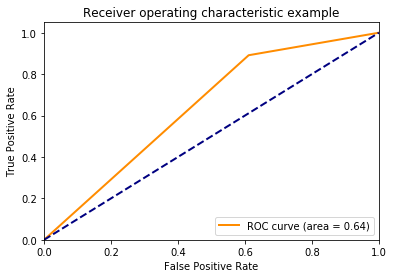

In [226]:
fpr, tpr, _ = roc_curve(y_test.ravel(), pred.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()